<a href="https://colab.research.google.com/github/jonnie763/DATA-Science-601/blob/main/Data_Science_601_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.Background Information 



*   Prevailing economic theory leads one to believe that the minimum wage decreases employment. Price theory, a theory that pertains to government mandated minimum set prices, states that a minimum wage will lead to excess labor of supply and a decrease in a demand for labor with a drop in employment. In other words, minimum wage is said to make those employed happy but hurting those looking for work. However, the evidence for this does not exactly agree with the theory.  
*   As a counter argument for the first point about price floors, economists have found empirically that moderately increasing the minimum wage does not increase unemployment. Additionally, it sometimes has some pretty substantial benefits. For example, one such study compared two state’s minimum wage laws after the state of New Jersey increase their minimum wage from 4.25 dollars per hour to 5.05 dollars per hour. What did economist find? It found that stores that had to increase their wages actually increased their employment (Card & Krueger, 1993). This states the disconnect between economic theory and practice (most of the time). 

*   It seems whether the minimum wage is a good idea is tied to whether or not the median wage of that region is high or low. It seems governments are aware of the potential costs of minimum wage hikes done too quickly and set up mechanisms to minimize these costs. The main mechanism is a slow yearly increase until it reaches its desired price floor, like in New Jersey, where its desired minimum will be reached in 2024 (Person, 2021). What happens when a mechanism like this is not in place? Sometimes, there is a net negative for all relevant parties. In Seattle, after a wage hike to 13 dollars an hour, “Wages went up, but employers cut back on work hours — so much so that low-wage workers ended up poorer to the equivalent of about 74 dollars per person, per month” (Rosalsky, 2019). In other cities, “The median hourly wage of the San Francisco Bay Area, for instance, is over 26 dollars. Dube says that's why in San Francisco and San Jose, which already have $15 minimum wages, there's no evidence of sizable job losses” (Rosalsky, 2019). This is to state two important points, in my previous post, I stated that large and fast increases could lead to job loss as price floor theory suggest. Whether or not that happens depends on two factors. One, if the wage is close to the median wage of that location job loss could ensue. Two, if there is a minimum wage hike that is too fast, such as in Seattle where the hike was 37 percent from the previous minimum wage floor law, then there is a net loss for workers. 


**References**


Wicks-Lim, Jannette. (2006). Measuring the Full Impact of Minimum and Living Wage Laws? Issue 11, 185-193.

Person. (2021, January 01). New Jersey minimum wage increases to $12. Retrieved January 09, 2021, from https://6abc.com/minimum-wage-new-jersey-12-an-hour-15-what-is-the/9252197/

Rosalsky, G. (2019, April 23). When does a minimum wage become too high? Retrieved January 09, 2021, from https://www.npr.org/sections/money/2019/04/23/716126740/when-does-a-minimum-wage-become-too-high












## 2.Questions to test 

**Hypothesis 1**: Does the minimum wage lead to job loss?

**Use Descriptive Stats**: Look at employment statistics before and after minimum wage increases and find additional patterns.

**Use Inferential Stats**: Use a Pearson's correlation to identify trends. 

**Hypothesis 2**: Does the minimum wage lead to a reduction in poverty?

**Use Descriptive Stats**: Look at the poverty statistics before and after minimum wage increases.

**Use Inferential Stats**: Use a Pearson's correlation to identify trends.  



## 3.Descriptive Statistics with Comparison

In [1]:
import matplotlib.pyplot as plt         #Import relevant libraries. Pandas for dataframes and ploty and matplotlib for visualization. Other libraries just in case.  
import pandas as pd 
import plotly.express as px 
import numpy as np
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
pd.set_option("max_rows", 5)             # Sometimes the print produces too many rows this is much cleaner 
plt.rcParams['figure.figsize'] = 15, 12  #Increase general size for matplot.lib

In [2]:
M_df=pd.read_csv("/content/Minimum Wage Data.csv",encoding='cp1252') # The main file we will use and manipulate 
M_df

,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,Department.Of.Labor.Cleaned.Low.Value,Department.Of.Labor.Cleaned.Low.Value.2020.Dollars,Department.Of.Labor.Cleaned.High.Value,Department.Of.Labor.Cleaned.High.Value.2020.Dollars,Footnote
0,1968,Alabama,0.00,0.00,1.15,8.55,1.15,8.55,34.80,...,0.00,0.00,0.00,0.00,NaN
1,1968,Alaska,2.10,15.61,1.15,8.55,2.10,15.61,34.80,2.1,2.10,15.61,2.10,15.61,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2860,2020,Wisconsin,7.25,7.25,7.25,7.25,7.25,7.25,258.66,7.25,7.25,7.25,7.25,7.25,NaN
2861,2020,Wyoming,5.15,5.15,7.25,7.25,7.25,7.25,258.66,5.15,5.15,5.15,5.15,5.15,NaN


In [3]:
M_df_1=M_df[M_df['State'].str.contains("Maryland")]  # Lets start by looking at Maryland 
M_df_1                                               # Wil will graph this below      

,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,Department.Of.Labor.Cleaned.Low.Value,Department.Of.Labor.Cleaned.Low.Value.2020.Dollars,Department.Of.Labor.Cleaned.High.Value,Department.Of.Labor.Cleaned.High.Value.2020.Dollars,Footnote
21,1968,Maryland,1.0,7.43,1.15,8.55,1.15,8.55,34.800,1.00 & 1.15,1.0,7.43,1.15,8.55,NaN
75,1969,Maryland,1.0,7.05,1.15,8.11,1.15,8.11,36.700,1.00 & 1.15,1.0,7.05,1.15,8.11,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2775,2019,Maryland,11.0,11.13,7.25,7.34,11.00,11.13,255.657,11,11.0,11.13,11.00,11.13,NaN
2829,2020,Maryland,11.0,11.00,7.25,7.25,11.00,11.00,258.660,11,11.0,11.00,11.00,11.00,NaN


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


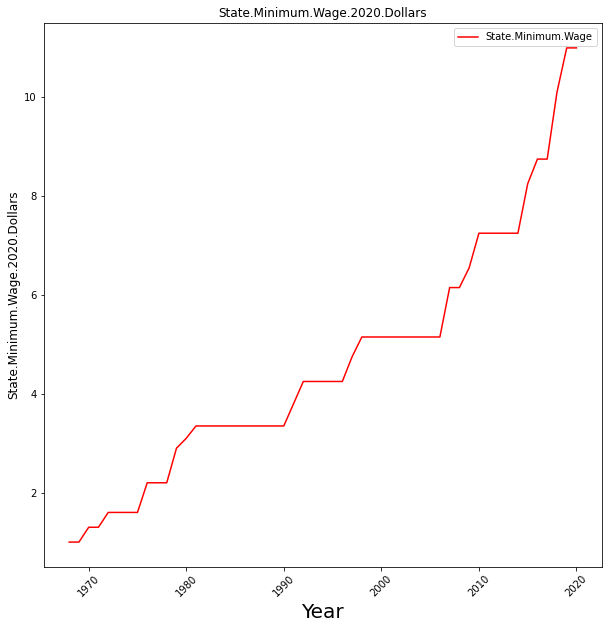

In [4]:
fig, ax = plt.subplots(figsize=(10,10))   


ax.set_ylabel("State.Minimum.Wage.2020.Dollars",fontname="Arial", fontsize=12)  

ax.set_xlabel("Year",fontname="Arial", fontsize=20)

ax.set_title("State.Minimum.Wage.2020.Dollars",fontname="Arial", fontsize=12)

M_df_1.plot(kind='line',x='Year',y="State.Minimum.Wage", legend= "GDP Percentage Growth", color="r", rot=45, ax = ax) # Everything here is pretty standard lets move on to infer from other graphs 


# Graph states with high minimum wages and check their unemployment rates (annotate them).

In [5]:
M_df=pd.read_csv("/content/Minimum Wage Data.csv",encoding='cp1252') # Keep reading this just in case, something goes awry 
M_df


,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,Department.Of.Labor.Cleaned.Low.Value,Department.Of.Labor.Cleaned.Low.Value.2020.Dollars,Department.Of.Labor.Cleaned.High.Value,Department.Of.Labor.Cleaned.High.Value.2020.Dollars,Footnote
0,1968,Alabama,0.00,0.00,1.15,8.55,1.15,8.55,34.80,...,0.00,0.00,0.00,0.00,NaN
1,1968,Alaska,2.10,15.61,1.15,8.55,2.10,15.61,34.80,2.1,2.10,15.61,2.10,15.61,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2860,2020,Wisconsin,7.25,7.25,7.25,7.25,7.25,7.25,258.66,7.25,7.25,7.25,7.25,7.25,NaN
2861,2020,Wyoming,5.15,5.15,7.25,7.25,7.25,7.25,258.66,5.15,5.15,5.15,5.15,5.15,NaN


In [6]:
M_df[2808:] # This is to identify only years of 2020, not the best way of doing this but accurate    

,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,Department.Of.Labor.Cleaned.Low.Value,Department.Of.Labor.Cleaned.Low.Value.2020.Dollars,Department.Of.Labor.Cleaned.High.Value,Department.Of.Labor.Cleaned.High.Value.2020.Dollars,Footnote
2808,2020,Alabama,0.00,0.00,7.25,7.25,7.25,7.25,258.66,...,0.00,0.00,0.00,0.00,NaN
2809,2020,Alaska,10.19,10.19,7.25,7.25,10.19,10.19,258.66,10.19,10.19,10.19,10.19,10.19,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2860,2020,Wisconsin,7.25,7.25,7.25,7.25,7.25,7.25,258.66,7.25,7.25,7.25,7.25,7.25,NaN
2861,2020,Wyoming,5.15,5.15,7.25,7.25,7.25,7.25,258.66,5.15,5.15,5.15,5.15,5.15,NaN


In [7]:
MA_df=M_df[2808:] 

In [8]:
pd.set_option("max_rows", 10) 

MA_df.sort_values(by=['State.Minimum.Wage'], inplace=True) # Similar data cleanse as before, but sorting value in order, we are looking at states with the ten highest minimum wages  

MA_df[44:]                                                 # Ten Highest Minimum wages 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,Department.Of.Labor.Cleaned.Low.Value,Department.Of.Labor.Cleaned.Low.Value.2020.Dollars,Department.Of.Labor.Cleaned.High.Value,Department.Of.Labor.Cleaned.High.Value.2020.Dollars,Footnote
2839,2020,New Jersey,11.00,11.00,7.25,7.25,11.00,11.00,258.66,11,11.00,11.00,11.00,11.00,NaN
2846,2020,Oregon,11.25,11.25,7.25,7.25,11.25,11.25,258.66,11.25,11.25,11.25,11.25,11.25,NaN
2841,2020,New York,11.80,11.80,7.25,7.25,11.80,11.80,258.66,11.8,11.80,11.80,11.80,11.80,NaN
2810,2020,Arizona,12.00,12.00,7.25,7.25,12.00,12.00,258.66,12,12.00,12.00,12.00,12.00,NaN
2828,2020,Maine,12.00,12.00,7.25,7.25,12.00,12.00,258.66,12,12.00,12.00,12.00,12.00,NaN
2813,2020,Colorado,12.00,12.00,7.25,7.25,12.00,12.00,258.66,12,12.00,12.00,12.00,12.00,NaN
2830,2020,Massachusetts,12.75,12.75,7.25,7.25,12.75,12.75,258.66,12.75,12.75,12.75,12.75,12.75,NaN
2812,2020,California,13.00,13.00,7.25,7.25,13.00,13.00,258.66,13,13.00,13.00,13.00,13.00,NaN
2858,2020,Washington,13.50,13.50,7.25,7.25,13.50,13.50,258.66,13.5,13.50,13.50,13.50,13.50,NaN
2816,2020,District of Columbia,14.00,14.00,7.25,7.25,14.00,14.00,258.66,14,14.00,14.00,14.00,14.00,NaN


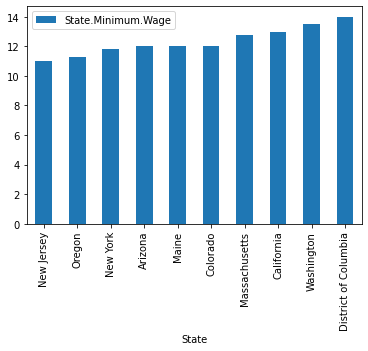

In [9]:
MA_df[44:].plot(kind='bar',x='State',y='State.Minimum.Wage') 

In [10]:
pd.set_option("max_rows", 10) # States with ten lowest minimum wages 
MA_df[:10]

,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,Department.Of.Labor.Cleaned.Low.Value,Department.Of.Labor.Cleaned.Low.Value.2020.Dollars,Department.Of.Labor.Cleaned.High.Value,Department.Of.Labor.Cleaned.High.Value.2020.Dollars,Footnote
2808,2020,Alabama,0.00,0.00,7.25,7.25,7.25,7.25,258.66,...,0.00,0.00,0.00,0.00,NaN
2852,2020,Tennessee,0.00,0.00,7.25,7.25,7.25,7.25,258.66,...,0.00,0.00,0.00,0.00,NaN
2850,2020,South Carolina,0.00,0.00,7.25,7.25,7.25,7.25,258.66,...,0.00,0.00,0.00,0.00,NaN
2833,2020,Mississippi,0.00,0.00,7.25,7.25,7.25,7.25,258.66,...,0.00,0.00,0.00,0.00,NaN
2827,2020,Louisiana,0.00,0.00,7.25,7.25,7.25,7.25,258.66,...,0.00,0.00,0.00,0.00,NaN
2845,2020,Oklahoma,2.00,2.00,7.25,7.25,7.25,7.25,258.66,2.00-7.25(g),2.00,2.00,7.25,7.25,(g)
2848,2020,Puerto Rico,5.08,5.08,7.25,7.25,7.25,7.25,258.66,5.08-7.25(i),5.08,5.08,7.25,7.25,(i)
2818,2020,Georgia,5.15,5.15,7.25,7.25,7.25,7.25,258.66,5.15(d),5.15,5.15,5.15,5.15,(d)
2861,2020,Wyoming,5.15,5.15,7.25,7.25,7.25,7.25,258.66,5.15,5.15,5.15,5.15,5.15,NaN
2853,2020,Texas,7.25,7.25,7.25,7.25,7.25,7.25,258.66,7.25,7.25,7.25,7.25,7.25,NaN


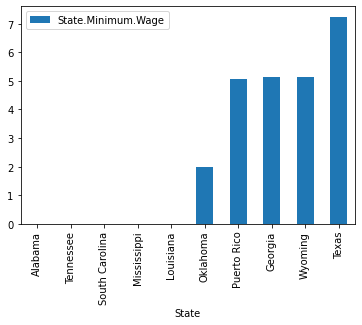

In [11]:
MA_df[:10].plot(kind='bar',x='State',y='State.Minimum.Wage') # Visualizations of lowest wages (Some states do not have a minimum wage, so they use the federal minimum of 7.25 dollars an hour )

In [12]:
top_10_lowest_Mwage= 5.78              #https://www.bls.gov/web/laus/laumstrk.htm

top_10_highest_Mwage= 7.05

print (top_10_lowest_Mwage)            # Average minimum wage of ten lowest states 

print (top_10_highest_Mwage)           # Average minimum wage of ten highest states 

5.78
7.05


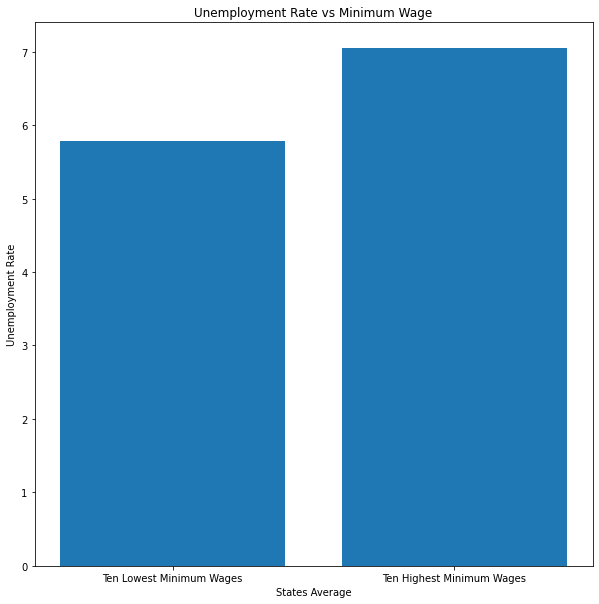

In [13]:
Poverty_Rate  = [5.78,7.05]                       # https://www.worldbank.org/en/topic/poverty/overview#:~:text=The%20global%20extreme%20poverty%20rate,%245.50%20a%20day%20in%202017
Country = ["Ten Lowest Minimum Wages","Ten Highest Minimum Wages",]  # Made my own dataframe, only needed two data points, no need for web scarping and csv, data is based off above link  
Poverty_Rate

fig, ax = plt.subplots(figsize=(10,10))

ax.bar(Country, Poverty_Rate)
ax.set_title("Unemployment Rate vs Minimum Wage")
ax.set_xlabel("States Average")
ax.set_ylabel("Unemployment Rate")

fig.show()

## **In the states with the ten lowest minimum wages, the unemployment rate is about 18 percent lower than in states with the ten highest minimum wages. The unemployment rate difference is about 1.3 percent.** 

# Graph states with high minimum wages and check their poverty rates (annotate them).

In [14]:
top_10_lowest_PRATE=(15.5+13.9+13.8+19.6+19.6+15.2+13.3+5.3+6.9)/9 #https://frac.org/maps/acs-poverty-state/tables/tab1-acs-poverty-st-2019.html

top_10_highest_PRATE= (9.2+11.4+13+13.5+10.9+9.3+9.4+11.8+9.8+13.5)/10

print (top_10_lowest_PRATE)

print (top_10_highest_PRATE)

13.677777777777779
11.18


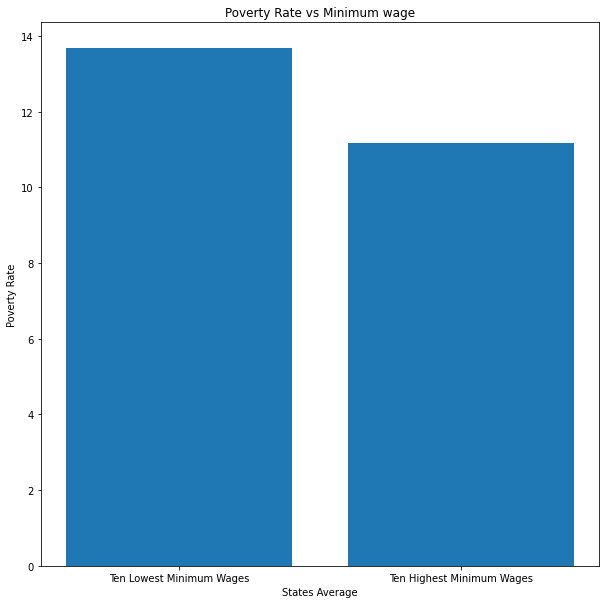

In [15]:
Poverty_Rate  = [13.677777777777779,11.18]                       # https://www.worldbank.org/en/topic/poverty/overview#:~:text=The%20global%20extreme%20poverty%20rate,%245.50%20a%20day%20in%202017
Country = ["Ten Lowest Minimum Wages","Ten Highest Minimum Wages",]  # Made my own dataframe, only needed two data points, no need for web scarping and csv, data is based off above link  
Poverty_Rate

fig, ax = plt.subplots(figsize=(10,10))

ax.bar(Country, Poverty_Rate)
ax.set_title("Poverty Rate vs Minimum wage")
ax.set_xlabel("States Average")
ax.set_ylabel("Poverty Rate")

fig.show()

## **In the states with the ten highest minimum wages, the poverty rate is about 18 percent lower than in states with the ten lowest minimum wages. The poverty rate difference is about 2.5 percent.** 

#4.Inferential Statistics 

#Find a correlation between unemployment rate and minimum wage (Maryland only)

In [16]:
# Find a correlation between unemployment rate and minimum wage (Maryland only)

M_df_1=M_df[M_df['State'].str.contains("Maryland")] #52
Mf_2=M_df_1["State.Minimum.Wage"]
Mf_2

21       1.00
75       1.00
129      1.30
183      1.30
237      1.60
        ...  
2613     8.75
2667     8.75
2721    10.10
2775    11.00
2829    11.00
Name: State.Minimum.Wage, Length: 53, dtype: float64

In [17]:
M_df_1
Mf_3=M_df_1.filter(like="State.Minimum.Wage")

Mf_4=Mf_3.drop(columns=["State.Minimum.Wage.2020.Dollars"])

Mf_6=Mf_4.tail(28) # Means last 28 years of data 



idx = 0                                                                                                                # Unfortunately had to insert this manually below because the file with the numbers had a monetary cost 
loc=idx
column='Maryland Unemployment Rate'  

new_col = [6.5,6,5.2,5,4.9,4.8,4.3,3.5,3.5,4.2,4.8,4.8,4.6,4.2,3.7,4.5,7.6,7.8,7.3,6.9,6.5,5.7,5,4.3,4.1,3.8,3.5,6.8] #https://www.statista.com/statistics/189434/unemployment-rate-in-maryland-since-1992/

Mf_6.insert(loc=idx, column='Maryland Unemployment Rate', value=new_col)                                              # Had to insert the list to a dataframe, and use a correlation to identify patterns 

In [18]:
Mf_6.corr(method ='pearson') # The dataframe doesn't always display the column, but it is there. Correlation here is weak. 

,Maryland Unemployment Rate,State.Minimum.Wage
Maryland Unemployment Rate,1.000000,0.054057
State.Minimum.Wage,0.054057,1.000000


## **The correlation between unemployment rate and the minimum wage here is weak or near zero. In the state of Maryland at least, no such correlation between the unemployment rate and the minimum exists.**

# Find a correlation between minimum wage and poverty

In [19]:
M_df=pd.read_csv("/content/Minimum Wage Data.csv",encoding='cp1252')
M_df

,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,Department.Of.Labor.Cleaned.Low.Value,Department.Of.Labor.Cleaned.Low.Value.2020.Dollars,Department.Of.Labor.Cleaned.High.Value,Department.Of.Labor.Cleaned.High.Value.2020.Dollars,Footnote
0,1968,Alabama,0.00000,0.00,1.15,8.55,1.15,8.55,34.80,...,0.00000,0.00,0.00000,0.00,NaN
1,1968,Alaska,2.10000,15.61,1.15,8.55,2.10,15.61,34.80,2.1,2.10000,15.61,2.10000,15.61,NaN
2,1968,Arizona,0.46800,3.48,1.15,8.55,1.15,8.55,34.80,18.72 - 26.40/wk(b),0.46800,3.48,0.66000,4.91,(b)
3,1968,Arkansas,0.15625,1.16,1.15,8.55,1.15,8.55,34.80,1.25/day(b),0.15625,1.16,0.15625,1.16,(b)
4,1968,California,1.65000,12.26,1.15,8.55,1.65,12.26,34.80,1.65(b),1.65000,12.26,1.65000,12.26,(b)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2857,2020,Virginia,7.25000,7.25,7.25,7.25,7.25,7.25,258.66,7.25[c],7.25000,7.25,7.25000,7.25,[c]
2858,2020,Washington,13.50000,13.50,7.25,7.25,13.50,13.50,258.66,13.5,13.50000,13.50,13.50000,13.50,NaN
2859,2020,West Virginia,8.75000,8.75,7.25,7.25,8.75,8.75,258.66,8.75,8.75000,8.75,8.75000,8.75,NaN
2860,2020,Wisconsin,7.25000,7.25,7.25,7.25,7.25,7.25,258.66,7.25,7.25000,7.25,7.25000,7.25,NaN


In [20]:
MT_DF=M_df[2754:2808] # Using 2019 data this time, combining State Minimum wage with poverty rates of the same states 
MT_DF

,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,Department.Of.Labor.Cleaned.Low.Value,Department.Of.Labor.Cleaned.Low.Value.2020.Dollars,Department.Of.Labor.Cleaned.High.Value,Department.Of.Labor.Cleaned.High.Value.2020.Dollars,Footnote
2754,2019,Alabama,0.00,0.00,7.25,7.34,7.25,7.34,255.657,...,0.00,0.00,0.00,0.00,NaN
2755,2019,Alaska,10.19,10.31,7.25,7.34,10.19,10.31,255.657,10.19,10.19,10.31,10.19,10.31,NaN
2756,2019,Arizona,12.00,12.14,7.25,7.34,12.00,12.14,255.657,12,12.00,12.14,12.00,12.14,NaN
2757,2019,Arkansas,9.25,9.36,7.25,7.34,9.25,9.36,255.657,9.25[c],9.25,9.36,9.25,9.36,[c]
2758,2019,California,12.00,12.14,7.25,7.34,12.00,12.14,255.657,12,12.00,12.14,12.00,12.14,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2803,2019,Virginia,7.25,7.34,7.25,7.34,7.25,7.34,255.657,7.25[c],7.25,7.34,7.25,7.34,[c]
2804,2019,Washington,13.50,13.66,7.25,7.34,13.50,13.66,255.657,13.5,13.50,13.66,13.50,13.66,NaN
2805,2019,West Virginia,8.75,8.85,7.25,7.34,8.75,8.85,255.657,8.75,8.75,8.85,8.75,8.85,NaN
2806,2019,Wisconsin,7.25,7.34,7.25,7.34,7.25,7.34,255.657,7.25,7.25,7.34,7.25,7.34,NaN


In [21]:
DF_Cleansed=MT_DF.drop([2765,2800]) # Need to join with other dataframe, so drop rows 
DF_Cleansed

,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,Department.Of.Labor.Cleaned.Low.Value,Department.Of.Labor.Cleaned.Low.Value.2020.Dollars,Department.Of.Labor.Cleaned.High.Value,Department.Of.Labor.Cleaned.High.Value.2020.Dollars,Footnote
2754,2019,Alabama,0.00,0.00,7.25,7.34,7.25,7.34,255.657,...,0.00,0.00,0.00,0.00,NaN
2755,2019,Alaska,10.19,10.31,7.25,7.34,10.19,10.31,255.657,10.19,10.19,10.31,10.19,10.31,NaN
2756,2019,Arizona,12.00,12.14,7.25,7.34,12.00,12.14,255.657,12,12.00,12.14,12.00,12.14,NaN
2757,2019,Arkansas,9.25,9.36,7.25,7.34,9.25,9.36,255.657,9.25[c],9.25,9.36,9.25,9.36,[c]
2758,2019,California,12.00,12.14,7.25,7.34,12.00,12.14,255.657,12,12.00,12.14,12.00,12.14,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2803,2019,Virginia,7.25,7.34,7.25,7.34,7.25,7.34,255.657,7.25[c],7.25,7.34,7.25,7.34,[c]
2804,2019,Washington,13.50,13.66,7.25,7.34,13.50,13.66,255.657,13.5,13.50,13.66,13.50,13.66,NaN
2805,2019,West Virginia,8.75,8.85,7.25,7.34,8.75,8.85,255.657,8.75,8.75,8.85,8.75,8.85,NaN
2806,2019,Wisconsin,7.25,7.34,7.25,7.34,7.25,7.34,255.657,7.25,7.25,7.34,7.25,7.34,NaN


In [22]:
MT_DF=M_df[2754:2808]        # 2019 data 
MT_DF["State.Minimum.Wage"]

2754     0.00
2755    10.19
2756    12.00
2757     9.25
2758    12.00
        ...  
2803     7.25
2804    13.50
2805     8.75
2806     7.25
2807     5.15
Name: State.Minimum.Wage, Length: 54, dtype: float64

In [23]:
M_df_10=pd.read_csv("/content/tab1_poverty_st_2019.csv",encoding='cp1252') # This is is the dataframe for poverty rates 
M_df_11=M_df_10.sort_values('State')
M_df_11.reset_index()

,index,State,Number,Percent,Number.1,Percent.1
0,6,Alabama,"739,108",15.5%,"1,564,727",32.7%
1,39,Alaska,"71,938",10.1%,"166,354",23.3%
2,12,Arizona,"958,442",13.5%,"2,039,244",28.7%
3,4,Arkansas,"474,739",16.2%,"1,047,098",35.7%
4,26,California,"4,552,837",11.8%,"9,852,166",25.4%
...,...,...,...,...,...,...
47,41,Virginia,"822,775",9.9%,"1,777,872",21.5%
48,43,Washington,"730,240",9.8%,"1,590,250",21.3%
49,5,West Virginia,"278,734",16.0%,"582,124",33.5%
50,36,Wisconsin,"591,486",10.4%,"1,301,784",22.9%


In [24]:
df_drop=DF_Cleansed.reset_index()

UE_states_df=df_drop.drop([39]).reset_index()

Final_UE_states_df=UE_states_df.filter(like="State.Minimum.Wage")                         # Making a column with just the wages 

Mf_4=UE_states_df=df_drop.drop([39]).reset_index()                                        # Needed to drop this row to join with the dataframe later 

Finalized_UE_states_df=Final_UE_states_df.drop(columns=["State.Minimum.Wage.2020.Dollars"])

Finalized_UE_states_df                                                                     # Creating a wage column based off 2019, and joining it with the poverty rate column later 

,State.Minimum.Wage
0,0.00
1,10.19
2,12.00
3,9.25
4,12.00
...,...
46,7.25
47,13.50
48,8.75
49,7.25


In [25]:
M_df_11_drop=DF_Cleansed.reset_index()

Poverty_States_df=M_df_11.drop([44]).reset_index()


Final_Poverty_States_df=Poverty_States_df.filter(like="Percent")


Final_Poverty_States_df                                          # Same idea as before but this time with poverty, instead of minimum wage 

,Percent,Percent.1
0,15.5%,32.7%
1,10.1%,23.3%
2,13.5%,28.7%
3,16.2%,35.7%
4,11.8%,25.4%
...,...,...
46,9.9%,21.5%
47,9.8%,21.3%
48,16.0%,33.5%
49,10.4%,22.9%


In [26]:
Finalized_Poverty_States_df=Final_Poverty_States_df.drop(columns=["Percent.1"]) # Only need one column
Finalized_Poverty_States_df

,Percent
0,15.5%
1,10.1%
2,13.5%
3,16.2%
4,11.8%
...,...
46,9.9%
47,9.8%
48,16.0%
49,10.4%


In [27]:
Correlation_df=Finalized_Poverty_States_df.join(Finalized_UE_states_df ) 
Correlation_df                                                           # Need to get rid of the percents 

,Percent,State.Minimum.Wage
0,15.5%,0.00
1,10.1%,10.19
2,13.5%,12.00
3,16.2%,9.25
4,11.8%,12.00
...,...,...
46,9.9%,7.25
47,9.8%,13.50
48,16.0%,8.75
49,10.4%,7.25


In [28]:
List_Percentages = [str(x).replace('%',' ') for x in Correlation_df["Percent"]] # Create a list with the percents columns and remove the symbol, reinsert the list later. 
List_Percentages

['15.5 ',
 '10.1 ',
 '13.5 ',
 '16.2 ',
 '11.8 ',
 '9.3 ',
 '10.0 ',
 '11.3 ',
 '13.5 ',
 '12.7 ',
 '13.3 ',
 '9.3 ',
 '11.2 ',
 '11.5 ',
 '11.9 ',
 '11.2 ',
 '11.4 ',
 '16.3 ',
 '19.0 ',
 '10.9 ',
 '9.0 ',
 '13.0 ',
 '9.0 ',
 '19.6 ',
 '12.9 ',
 '12.6 ',
 '9.9 ',
 '12.5 ',
 '7.3 ',
 '9.2 ',
 '18.2 ',
 '13.0 ',
 '13.6 ',
 '10.6 ',
 '13.1 ',
 '15.2 ',
 '11.4 ',
 '12.0 ',
 '10.8 ',
 '13.8 ',
 '11.9 ',
 '13.9 ',
 '13.6 ',
 '12.3 ',
 '8.9 ',
 '10.2 ',
 '9.9 ',
 '9.8 ',
 '16.0 ',
 '10.4 ',
 '10.1 ']

In [29]:
Correlation_df['Percents Poverty'] = List_Percentages

List_Percentages                                      # Inserting the list to the dataframe 

['15.5 ',
 '10.1 ',
 '13.5 ',
 '16.2 ',
 '11.8 ',
 '9.3 ',
 '10.0 ',
 '11.3 ',
 '13.5 ',
 '12.7 ',
 '13.3 ',
 '9.3 ',
 '11.2 ',
 '11.5 ',
 '11.9 ',
 '11.2 ',
 '11.4 ',
 '16.3 ',
 '19.0 ',
 '10.9 ',
 '9.0 ',
 '13.0 ',
 '9.0 ',
 '19.6 ',
 '12.9 ',
 '12.6 ',
 '9.9 ',
 '12.5 ',
 '7.3 ',
 '9.2 ',
 '18.2 ',
 '13.0 ',
 '13.6 ',
 '10.6 ',
 '13.1 ',
 '15.2 ',
 '11.4 ',
 '12.0 ',
 '10.8 ',
 '13.8 ',
 '11.9 ',
 '13.9 ',
 '13.6 ',
 '12.3 ',
 '8.9 ',
 '10.2 ',
 '9.9 ',
 '9.8 ',
 '16.0 ',
 '10.4 ',
 '10.1 ']

In [30]:
Correlation_df_2=Correlation_df.drop(columns=["Percent"])

Correlation_df_2                                          # Almost done but everything in this dataframe needs to be a float 

,State.Minimum.Wage,Percents Poverty
0,0.00,15.5
1,10.19,10.1
2,12.00,13.5
3,9.25,16.2
4,12.00,11.8
...,...,...
46,7.25,9.9
47,13.50,9.8
48,8.75,16.0
49,7.25,10.4


In [31]:
Correlation_df_3=Correlation_df_2.astype(float)# After this can run a correlation 

In [32]:
Correlation_df_3.corr(method ='pearson')      # A slight negative correlation 

,State.Minimum.Wage,Percents Poverty
State.Minimum.Wage,1.000000,-0.192691
Percents Poverty,-0.192691,1.000000


## **The correlation between poverty rate and the minimum wage here is almost moderate, however its still pretty weak.**

# 5.Conclusions

**Hypothesis 1**: Does the minimum wage lead to job loss?



*   When inferring from a selection of states using descriptive statistics, unemployment rate is a little lower in states where there is a lower minimum wage.
*   When running a correlation of the state of Maryland, there is no correlation between unemployment and a rising minimum wage.

*   **Because of the conflicting data, the answer to his question is inconclusive.**






**Hypothesis 2**: Does the minimum wage lead to a reduction in poverty?


*   When inferring from a selection of states using descriptive statistics, the poverty rate is a little lower in states where is a higher minimum wage.
*   When running a correlation of the states from 2019, there is a weak but almost moderate correlation between a lower poverty rate and a higher minimum wage.

*   **As a result, minimum wage seems to mean lower poverty rates based off the states with the highest minimum wages, but the correlation of 2019 data seems weak. So the answer to this question is a weak yes, or inconclusive.** 






**Limitations within Data**

Reason for why states may have lower or higher poverty/unemployment rates not explanied by the minimum wage. 


1.   Varying amount of state spending on education. Educational spending corrlates with lower poverty. 
2.   Varying amount of regulations on businesses, making it easier or harder to employ workers. 
3.   Varying amount of state spending on healthcare such as medicaid. States determine medicaid requirements. Healthcare spending corrlates with lower poverty.  




